## Adam Algorithm


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [6]:
x_data = np.linspace(0,20,50)
y_data = -1 * x_data + 2* np.ones(len(x_data))
x_data = x_data.reshape(len(x_data),1)
x_data = np.insert(x_data,0,np.ones(x_data.shape[0]),axis=1)
thetas = np.zeros(x_data.shape[1])
learning_rate = 0.001
epsilon = 0.0001
beta1 = 0.9
beta2 = 0.99
learning_rate2 = 0.05
epsilon2 = 0.001
beta12 = 0.85
beta22 = 0.999

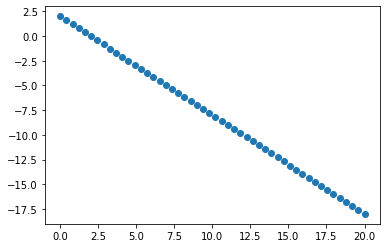

In [7]:
plt.scatter(x_data[:,1],y_data)
plt.show()

In [8]:
def predict_y(all_thetas,x_values):
    return x_values @ all_thetas

def gradient_thetas(x_values,y_values,all_thetas):
    return (1/len(x_values[:,0]))*(x_values.T @(predict_y(all_thetas,x_values)- y_values))

def update_thetas (all_thetas,lrate,x_values,y_values,vt,mt,bta1,bta2,epsln):
    mt = bta1 * mt + (1-bta1) * gradient_thetas(x_values,y_values,all_thetas)
    vt = bta2 * vt + (1-bta2) * (gradient_thetas(x_values,y_values,all_thetas))**2
    adlrate = lrate / ((np.sqrt(vt))+epsln)
    return all_thetas - adlrate * mt

def data_loss(x_values,y_values,all_thetas):
    return (1/len(x_values[:,0]))*np.sum((predict_y(all_thetas,x_values)- y_values)**2)

In [9]:
def adam(x_values,y_values,all_thetas,lrate,epsln,bta1,bta2):
    data_all_loss = []
    data_all_thetas = []
    all_predictions = []
    vt=np.zeros(x_data.shape[1])
    mt=np.zeros(x_data.shape[1])
    count=1
    for i in range(1000):
        vt = vt /(1-bta2**count)
        mt = mt /(1-bta1**count)
        all_thetas = update_thetas(all_thetas,lrate,x_values,y_values,vt,mt,bta1,bta2,epsln)
        data_all_thetas.append(all_thetas)
        data_all_loss.append(data_loss(x_values,y_values,all_thetas))
        y_predict = predict_y(all_thetas,x_values)
        all_predictions.append(y_predict)
        count+=1
        if i>=1 and abs(data_all_loss[-1] - data_all_loss[-2])<1e-2:
            break
    return y_predict,count-1,data_all_thetas,data_all_loss,all_predictions

# First Trial Plots

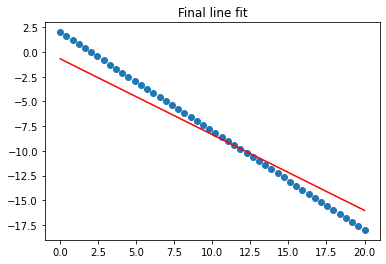

In [10]:
plt.title("Final line fit")
plt.scatter(x_data[:,1],y_data)
plt.plot(x_data[:,1],adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[0],color="red")
plt.show()

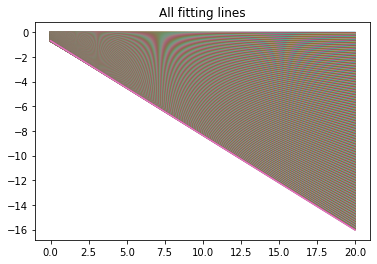

In [13]:
plt.title("All fitting lines")
for i in range (len(adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[4])):
    plt.plot(x_data[:,1],adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[4][i])
plt.show()

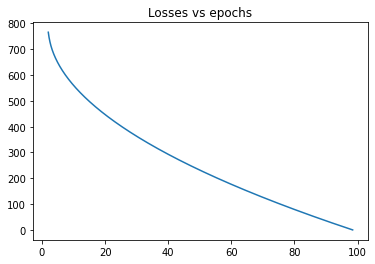

In [12]:
plt.title("Losses vs epochs")
plt.plot(adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[3],
         list(range(adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[1])))
plt.show()

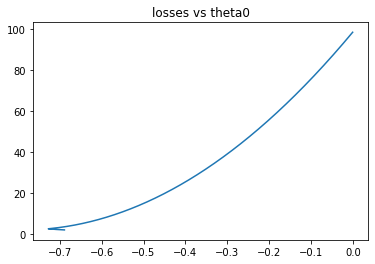

In [14]:
plt.title("losses vs theta0")
losses = np.array(adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[2])
plt.plot(losses[:,0],
        adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[3])
plt.show()

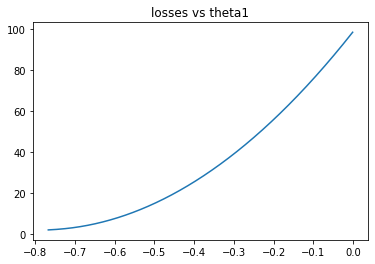

In [15]:
plt.title("losses vs theta1")
losses = np.array(adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[2])
plt.plot(losses[:,1],adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[3])
plt.show()

# Second Trial Plots

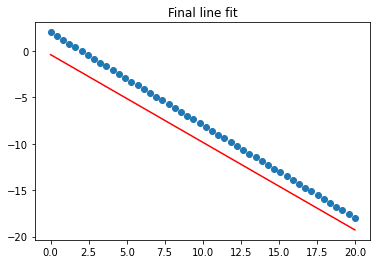

In [16]:
plt.title("Final line fit")
plt.scatter(x_data[:,1],y_data)
plt.plot(x_data[:,1],adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[0],color="red")
plt.show()

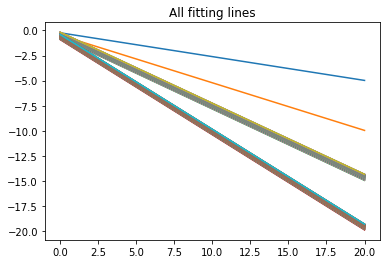

In [17]:
plt.title("All fitting lines")
for i in range (len(adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[4])):
    plt.plot(x_data[:,1],adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[4][i])
plt.show()

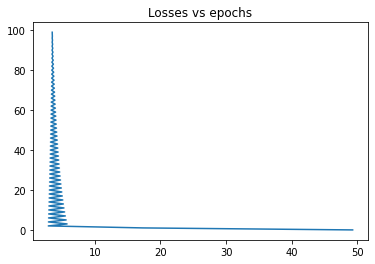

In [18]:
plt.title("Losses vs epochs")
plt.plot(adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[3],
         list(range(adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[1])))
plt.show()

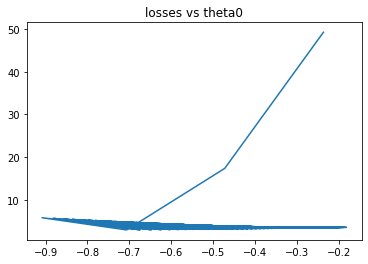

In [20]:
plt.title("losses vs theta0")
losses = np.array(adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[2])
plt.plot(losses[:,0],
        adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[3])
plt.show()

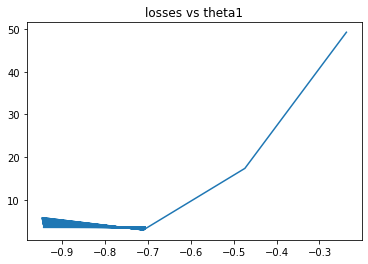

In [21]:
plt.title("losses vs theta1")
losses = np.array(adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[2])
plt.plot(losses[:,1],adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[3])
plt.show()

# Accuracy Scores

In [22]:
print(f"The Accuracy = {r2_score(y_data,adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[0])}")
print(f"The number of iterations needed = {adam(x_data,y_data,thetas,learning_rate,epsilon,beta1,beta2)[1]}")

The Accuracy = 0.9419968189555604
The number of iterations needed = 767


In [23]:
print(f"The Accuracy = {r2_score(y_data,adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[0])}")
print(f"The number of iterations needed = {adam(x_data,y_data,thetas,learning_rate2,epsilon2,beta12,beta22)[1]}")


The Accuracy = 0.8983615503136055
The number of iterations needed = 100
